# Dataset Kangle produção de lixo e reciclagem de 2011 a 2020

In [ ]:
! pip install pandas

In [2]:
import pandas as pd

In [3]:
paises_poluentes = pd.read_csv('datasets/global_pollution.csv')

In [4]:
paises_poluentes.head()

,region_id,country_name,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,LCN,Aruba,35563.312500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN
1,SAS,Afghanistan,2057.062256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,SSF,Angola,8036.690430,51.8,6.7,4.4,11.50,11.9,13.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ECS,Albania,13724.058590,51.4,4.5,4.8,15.21,9.9,9.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Some disposal sites
4,ECS,Andorra,43711.800780,31.2,8.2,2.6,11.60,35.1,11.3,NaN,...,NaN,52.1,NaN,NaN,NaN,NaN,NaN,47.9,NaN,NaN


In [18]:
paises_poluentes.columns

Index(['region_id', 'country_name', 'gdp',
       'composition_food_organic_waste_percent', 'composition_glass_percent',
       'composition_metal_percent', 'composition_other_percent',
       'composition_paper_cardboard_percent', 'composition_plastic_percent',
       'composition_rubber_leather_percent', 'composition_wood_percent',
       'composition_yard_garden_green_waste_percent',
       'other_information_information_system_for_solid_waste_management',
       'other_information_national_agency_to_enforce_solid_waste_laws_and_regulations',
       'other_information_national_law_governing_solid_waste_management_in_the_country',
       'other_information_ppp_rules_and_regulations',
       'other_information_summary_of_key_solid_waste_information_made_available_to_the_public',
       'population_population_number_of_people',
       'special_waste_agricultural_waste_tons_year',
       'special_waste_construction_and_demolition_waste_tons_year',
       'special_waste_e_waste_tons_year

In [5]:
import matplotlib.pyplot as plt

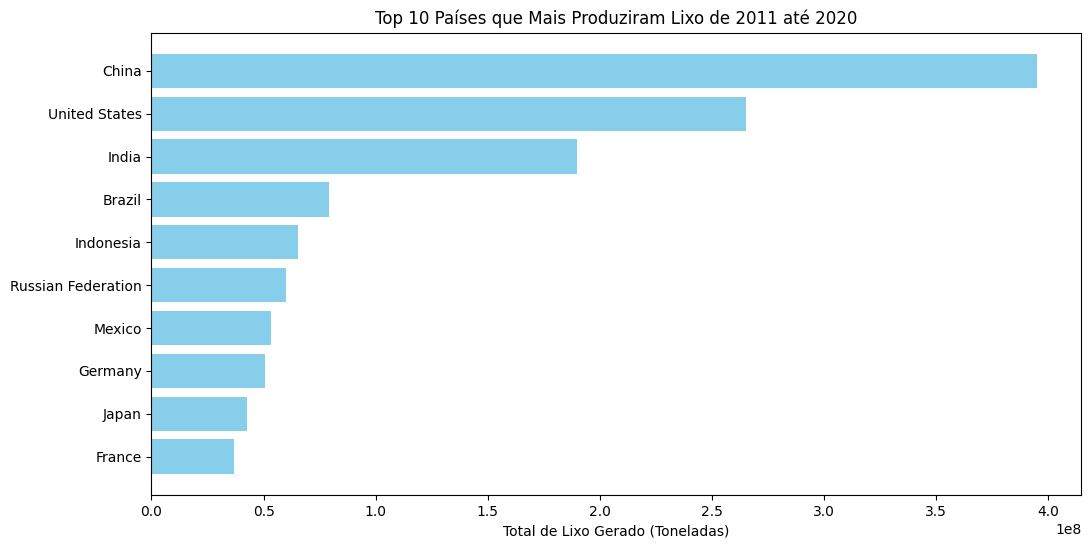

In [14]:
# Selecionar as colunas relevantes
colunas_desejadas = [
    'country_name',
    'total_msw_total_msw_generated_tons_year'
]

# Criar um novo DataFrame com as colunas selecionadas
dados_lixo = paises_poluentes[colunas_desejadas].copy()

# Remover linhas com valores NaN na coluna de lixo gerado
dados_lixo.dropna(subset=['total_msw_total_msw_generated_tons_year'], inplace=True)

# Ordenar os dados pela quantidade total de lixo gerado
dados_lixo.sort_values(by='total_msw_total_msw_generated_tons_year', ascending=False, inplace=True)

# Selecionar os 10 países que mais produzem lixo
top_paises = dados_lixo.head(10)

# Criar o gráfico
plt.figure(figsize=(12, 6))
plt.barh(top_paises['country_name'], top_paises['total_msw_total_msw_generated_tons_year'], color='skyblue')
plt.xlabel('Total de Lixo Gerado (Toneladas)')
plt.title('Top 10 Países que Mais Produziram Lixo de 2011 até 2020')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar o maior primeiro
plt.show()

- Lemos o arquivo CSV e selecionamos as colunas necessárias.
- Filtramos os valores nulos e convertemos para valores numéricos.0
- Selecionamos os 10 países com a maior quantidade de lixo total gerado.
- Calculamos o valor reciclado multiplicando o total gerado pela porcentagem reciclada.
- Plotamos um gráfico de barras com a quantidade de lixo total e reciclada.

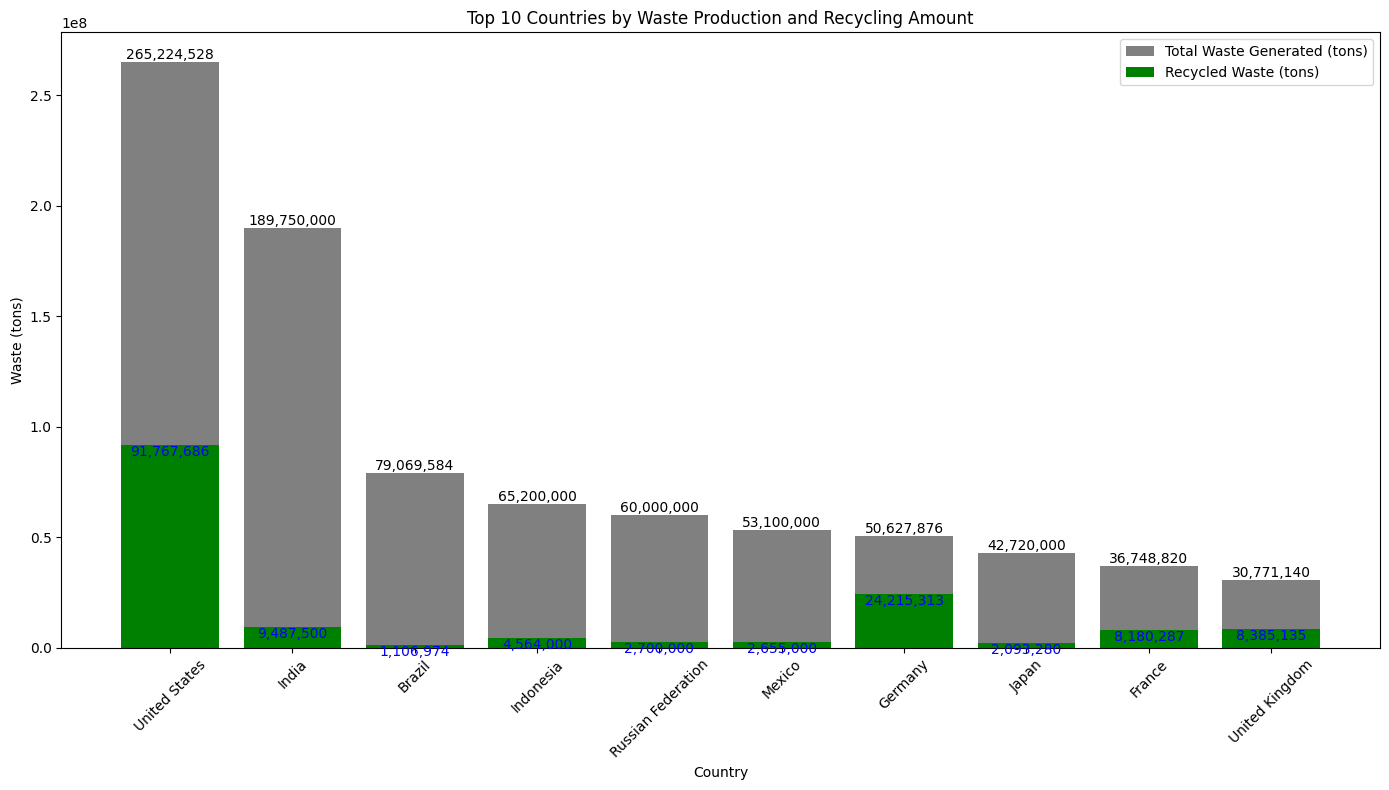

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo CSV
dataset = pd.read_csv('datasets/global_pollution.csv')

# Selecionar as colunas necessárias
dataset = dataset[['country_name', 'total_msw_total_msw_generated_tons_year', 'waste_treatment_recycling_percent']]

# Remover valores nulos e converter para tipo numérico
dataset = dataset.dropna(subset=['total_msw_total_msw_generated_tons_year', 'waste_treatment_recycling_percent'])
dataset['total_msw_total_msw_generated_tons_year'] = pd.to_numeric(dataset['total_msw_total_msw_generated_tons_year'])
dataset['waste_treatment_recycling_percent'] = pd.to_numeric(dataset['waste_treatment_recycling_percent'])

# Ordenar pelos 10 países que mais produzem lixo
top10_countries = dataset.nlargest(10, 'total_msw_total_msw_generated_tons_year')

# Calcular a quantidade reciclada em toneladas
top10_countries['recycled_msw'] = (top10_countries['total_msw_total_msw_generated_tons_year'] * 
                                top10_countries['waste_treatment_recycling_percent'] / 100)

# Configurar o gráfico
plt.figure(figsize=(14, 8))
bars_total = plt.bar(top10_countries['country_name'], top10_countries['total_msw_total_msw_generated_tons_year'], 
                    color='gray', label='Total Waste Generated (tons)')
bars_recycled = plt.bar(top10_countries['country_name'], top10_countries['recycled_msw'], 
                        color='green', label='Recycled Waste (tons)')

# Adicionar rótulos com os valores dentro das barras
for bar in bars_total:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval):,}', ha='center', va='bottom', fontsize=10, color='black')

for bar in bars_recycled:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval - 5, f'{int(yval):,}', ha='center', va='top', fontsize=10, color='blue')

# Adicionar rótulos e título
plt.xlabel('Country')
plt.ylabel('Waste (tons)')
plt.title('Top 10 Countries by Waste Production and Recycling Amount')
plt.legend()

# Exibir o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


- O gráfico exibe dados anuais de geração de resíduos sólidos (total de lixo produzido) e de reciclagem para os 10 países com maior produção de lixo, com a última atualização geralmente vinda de relatórios anuais. No contexto global, esses dados ajudam a ilustrar o total de resíduos gerados em toneladas e a quantidade que é reciclada, com foco em países que produzem grandes quantidades de resíduos sólidos urbanos (MSW, Municipal Solid Waste).

-Explicação dos Dados no Gráfico
- Total de Resíduos Gerados:

- Essa métrica mostra o total anual de resíduos sólidos urbanos gerados em cada país, medido em toneladas por ano.
- Os resíduos sólidos urbanos incluem materiais descartados pela população em áreas residenciais, comerciais, institucionais e de construção, entre outros.
-Exemplos incluem papel, plásticos, metais, vidro, orgânicos (como restos de comida), e produtos especiais, como resíduos de construção ou eletrônicos.


-Percentual de Reciclagem:

- Esse dado representa a porcentagem do lixo total que é efetivamente reciclada em cada país.
A reciclagem é uma forma de tratamento que visa recuperar e reutilizar materiais, diminuindo o impacto ambiental dos resíduos.
Calcula-se a quantidade reciclada multiplicando o total de resíduos gerados pela porcentagem de reciclagem fornecida, resultando na tonelagem reciclada mostrada nas barras verdes.
Período dos Dados:

- Em bases de dados globais, como as da ONU ou do Banco Mundial, o período geralmente refere-se ao ano mais recente em que os dados foram consolidados, como 2020 ou 2021, dependendo da disponibilidade de cada país. A maioria dos países atualiza esses dados anualmente em seus relatórios ambientais.
Interpretação do Gráfico
- O gráfico exibe barras cinzas, representando a quantidade total de lixo gerado em cada país, e barras verdes, que indicam o total reciclado.
Este visual ajuda a ver, entre os países que mais geram resíduos, aqueles que também têm programas de reciclagem significativos.
Países com maior proporção de lixo reciclado são visualmente diferenciados no gráfico, permitindo identificar quem está liderando em práticas de reciclagem dentro do grupo dos maiores produtores de lixo.
- Esses dados são fundamentais para avaliar os esforços de sustentabilidade e gerenciamento de resíduos de cada país, pois mostram não apenas a produção total de resíduos, mas também a eficácia de suas políticas de reciclagem.

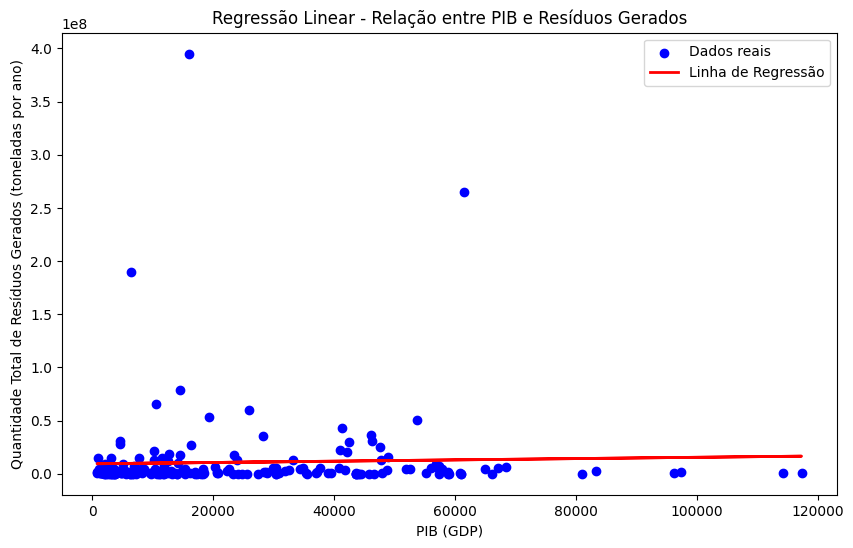

Mean Squared Error: 113500645769015.56
Coeficiente de Determinação (R²): -0.3693981301419633


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Carregar o dataset
dataset = pd.read_csv('datasets/global_pollution.csv')

# Selecionar as colunas para a análise
# Variável independente: PIB (gdp)
# Variável dependente: Quantidade total de resíduos (total_msw_total_msw_generated_tons_year)
dataset = dataset[['gdp', 'total_msw_total_msw_generated_tons_year']]

# Remover valores nulos
dataset = dataset.dropna()

# Definir X e y para o modelo
X = dataset[['gdp']]
y = dataset['total_msw_total_msw_generated_tons_year']

# Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões e avaliação do modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

# Plotar os dados e a linha de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Dados reais')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linha de Regressão')
plt.xlabel('PIB (GDP)')
plt.ylabel('Quantidade Total de Resíduos Gerados (toneladas por ano)')
plt.title('Regressão Linear - Relação entre PIB e Resíduos Gerados')
plt.legend()
plt.show()

# Exibir o desempenho do modelo
print(f"Mean Squared Error: {mse}")
print(f"Coeficiente de Determinação (R²): {r2}")


- Para criar um gráfico usando regressão linear com dados do dataset paises_poluentes, é ideal escolher uma variável dependente contínua que desejamos prever com base em uma ou mais variáveis independentes também contínuas. Em dados de poluição e resíduos, podemos explorar relações como:

- PIB (gdp) versus quantidade de resíduos gerados (total_msw_total_msw_generated_tons_year), para ver se países com PIB mais alto tendem a gerar mais resíduos.
População (population_population_number_of_people) versus resíduos gerados (total_msw_total_msw_generated_tons_year), para verificar se uma população maior está associada a uma geração maior de resíduos.
Aqui está um exemplo de análise de relação entre PIB e a quantidade total de resíduos gerados usando regressão linear:

- Explicação do Código
Treinamento do Modelo:

- Utilizamos uma regressão linear para prever a quantidade de resíduos gerados com base no PIB.
Avaliação do Modelo:

- Calculamos o erro médio quadrático (MSE) e o coeficiente de determinação (R²) para entender a qualidade do ajuste.
Visualização:

- O gráfico exibe os dados reais de PIB e resíduos gerados em azul, e a linha de regressão em vermelho, mostrando a tendência estimada pela regressão linear.
Interpretação dos Resultados
- Linha de Regressão: Representa a relação entre o PIB e a quantidade de resíduos gerados. Se a linha tem uma inclinação positiva, indica que um PIB mais alto tende a estar associado a uma maior geração de resíduos.
R²: Indica a proporção de variância explicada pelo modelo. Quanto mais próximo de 1, melhor o modelo explica a variação dos dados.

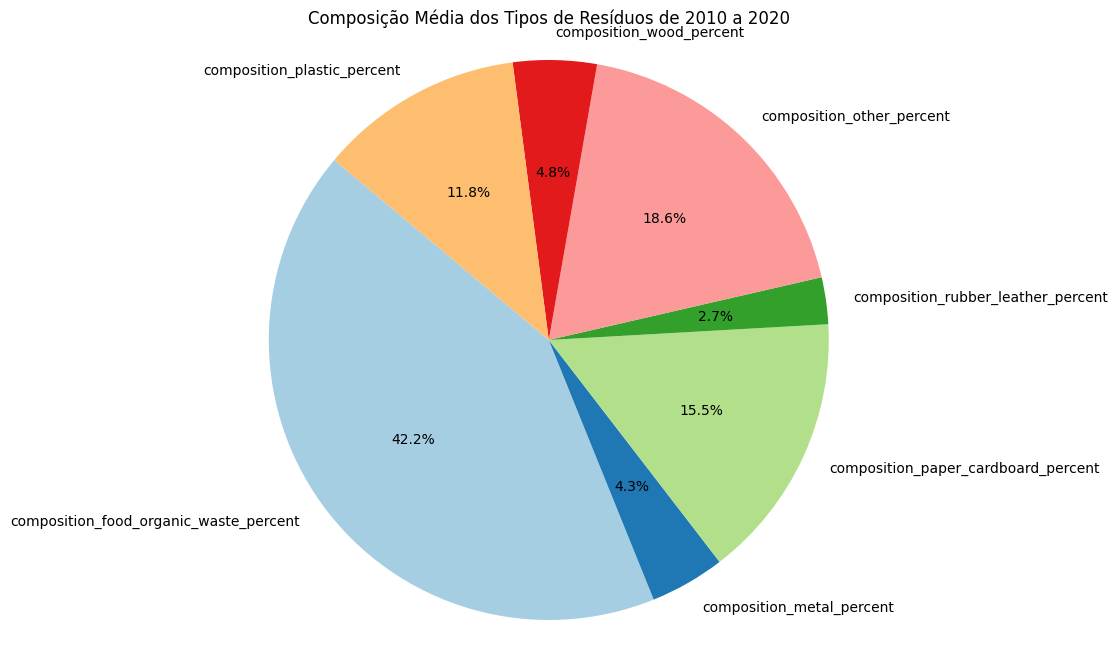

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Selecionar as colunas relevantes de composição de resíduos
colunas_residuos = [
    'composition_food_organic_waste_percent',
    'composition_metal_percent',
    'composition_paper_cardboard_percent',
    'composition_rubber_leather_percent',
    'composition_other_percent',
    'composition_wood_percent',
    'composition_plastic_percent'
]

# Calcular a média de cada tipo de resíduo
media_residuos = paises_poluentes[colunas_residuos].mean()

# Criar o gráfico de pizza
plt.figure(figsize=(10, 8))
plt.pie(media_residuos, labels=media_residuos.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Composição Média dos Tipos de Resíduos de 2010 a 2020')
plt.axis('equal')  # Igualar os eixos para que o gráfico seja um círculo
plt.show()